In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

INPUTS_PATH = os.path.join(os.getcwd(), 'data', 'inputs')
FUTURES_DATA_PATH = os.path.join(INPUTS_PATH, 'pinnacle', 'CLCDATA')

### Select Assets with Clustering + PCA

- 'XU': Euro Stoxx 50 (cluster=0)
- 'ES': S&P 500 E-Mini (cluster=0)
- 'TY': 10-Year Treasury (cluster=1)
- 'FB': 5-Year Treasury (cluster=1)
- 'ZG': Gold (cluster=2)
- 'ZI': Silver (cluster=2)
- 'ZN': Natural Gas (cluster=3)
- 'ZU': Crude Oil (cluster=3)



In [17]:
continuous_future_method = 'RAD'

tickers = {

    # commodities
    ## grains
    'ZC': ['close'], # corn
    'ZO': ['close'], # oats
    'ZL': ['close'], # soybean oil
    'ZR': ['close'], # rough rice
    'ZW': ['close'], # wheat
    ## softs
    'CC': ['close'], # cocoa
    'DA': ['close'], # milk
    'JO': ['close'], # orange juice
    'KC': ['close'], # coffee
    'SB': ['close'], # sugar
    ## livestock
    'LB': ['close'], # lumber
    'ZF': ['close'], # feeder cattle
    'ZZ': ['close'], # lean hogs
    'ZT': ['close'], # live cattle
    ## metals
    'ZG': ['close'], # gold
    'ZI': ['close'], # silver
    'ZK': ['close'], # copper
    'ZP': ['close'], # platinum
    ## energy
    'ZN': ['close'], # natural gas
    'ZU': ['close'], # crude oil
    
    # bonds
    'CB': ['close'], # 10-year canadian bond
    'DT': ['close'], # euro bund
    'EC': ['close'], # eurodollar
    'FB': ['close'], # 5-year us treasury bond
    'GS': ['close'], # gilt
    'TU': ['close'], # 2-year us treasury note
    'TY': ['close'], # 10-year us treasury note
    'UB': ['close'], # ultra us treasury bond
    # 'US': ['close'], # T-bonds
    'UZ': ['close'], # euro schatz
    
    # # fx
    'AN': ['close'], # audusd
    'CN': ['close'], # cadusd
    'BN': ['close'], # gbpusd
    'DX': ['close'], # us dollar index
    'JN': ['close'], # jpyusd
    'MP': ['close'], # mxnusd
    'SN': ['close'], # chfusd

    # # equities
    # 'FN': ['close'], # euro
    'NK': ['close'], # nikkei
    # 'CA': ['close'], # cac 40
    # 'EN': ['close'], # nasdaq mini
    # 'ER': ['close'], # russell 2000 mini
    'ES': ['close'], # e-mini s&p 500
    'LX': ['close'], # ftse 100
    # 'MD': ['close'], # S&P 400 midcap
    'XU': ['close'], # euro stoxx 50

}

tickers_data = []
for ticker, flds in tickers.items():
    ticker_data = pd.read_csv(
        os.path.join(FUTURES_DATA_PATH, f'{ticker}_{continuous_future_method}.CSV'),
    )

    # name columns appropriately
    ticker_data.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'open_interest']

    # fix date format
    ticker_data['date'] = pd.to_datetime(ticker_data['date'], format='%m/%d/%Y')

    # select flds
    ticker_data = ticker_data[['date'] + flds]

    # set date as index
    ticker_data.set_index('date', inplace=True)

    # rename flds
    if len(flds) == 1:
        ticker_data.rename(columns={flds[0]: ticker}, inplace=True)
    else:
        ticker_data.rename(columns={fld: f'{ticker}_{fld}' for fld in flds}, inplace=True)

    tickers_data.append(ticker_data)
tickers_data = pd.concat(tickers_data, axis=1)

# resample data to business days and forward fill missing values
tickers_data = tickers_data.resample('B').last().ffill()

# get non-na intersection of all tickers
tickers_data_nonan = tickers_data.copy().dropna(how='any')

# ticker returns
tickers_returns = tickers_data_nonan.pct_change().dropna()

In [18]:
# first non-na date for each ticker in the columns of tickers_data_nonan
first_non_na_dates = pd.DataFrame(tickers_data.apply(lambda x: x.first_valid_index()))
first_non_na_dates.sort_values(by=0)

,0
ZL,1969-01-03
ZW,1969-01-03
ZC,1970-01-06
ZZ,1970-01-06
ZT,1971-01-05
ZP,1973-01-03
ZI,1973-01-03
JO,1973-01-03
LB,1974-01-03
KC,1974-01-03


<Axes: title={'center': 'Futures Returns'}, xlabel='date'>

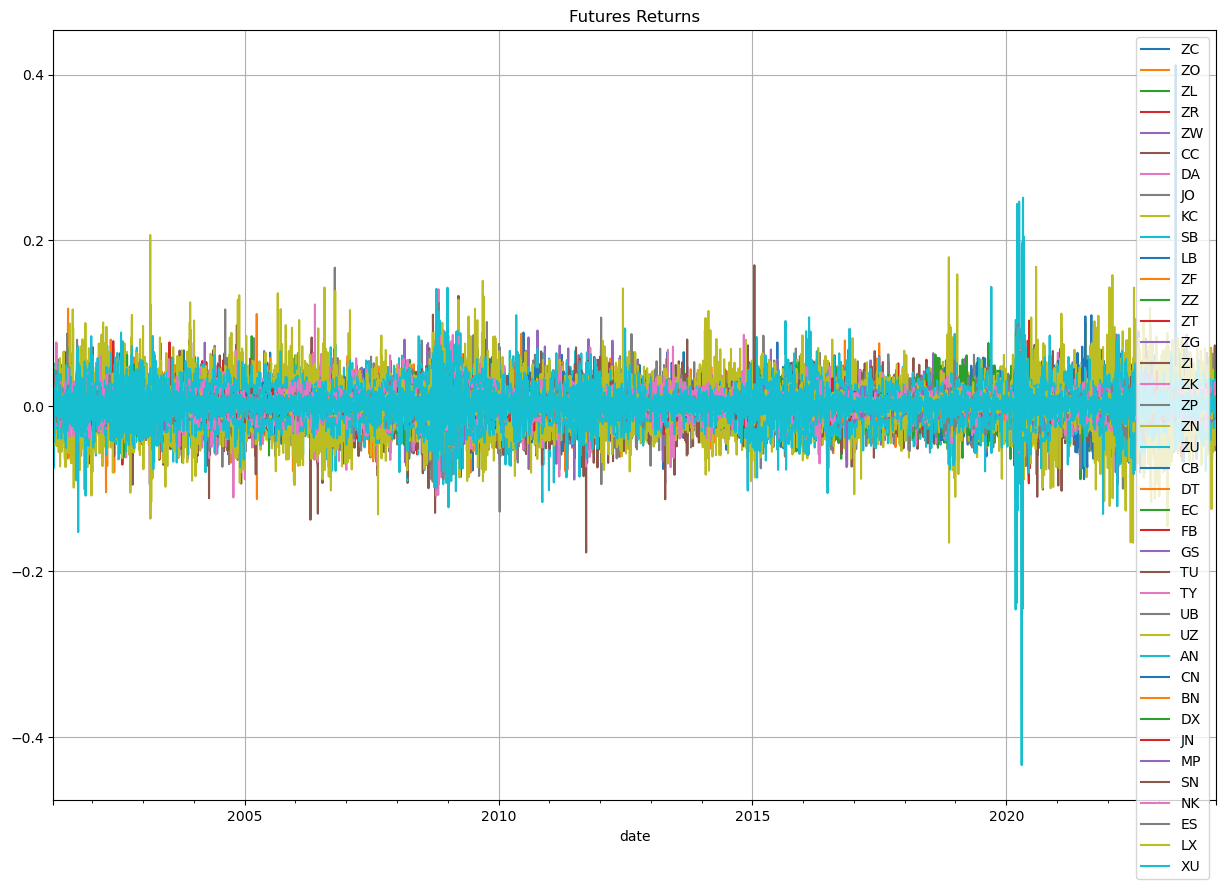

In [19]:
tickers_returns.plot(figsize=(15, 10), title='Futures Returns', grid=True)

In [20]:
# find which columns has a value of > 0.8
tickers_returns[tickers_returns > 0.8].count().sort_values(ascending=False)

ZC    0
ZO    0
EC    0
FB    0
GS    0
TU    0
TY    0
UB    0
UZ    0
AN    0
CN    0
BN    0
DX    0
JN    0
MP    0
SN    0
NK    0
ES    0
LX    0
DT    0
CB    0
ZU    0
SB    0
ZL    0
ZR    0
ZW    0
CC    0
DA    0
JO    0
KC    0
LB    0
ZN    0
ZF    0
ZZ    0
ZT    0
ZG    0
ZI    0
ZK    0
ZP    0
XU    0
dtype: int64

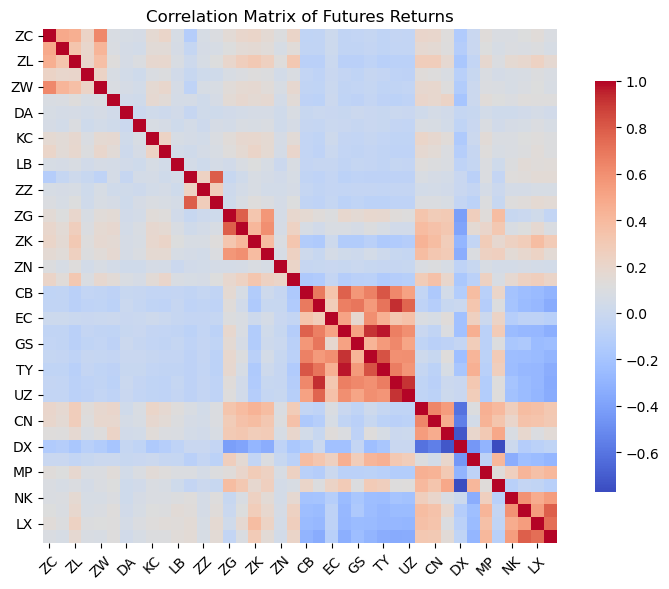

In [21]:
# heatmap of correlations
correlation_matrix = tickers_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Futures Returns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

def run_elbow_kmeans_auto(corr_matrix, max_k=7, plot=True, random_state=42, fixed_k=None):
    # Convert correlation matrix to a dissimilarity matrix (1 - corr)
    distance_matrix = 1 - corr_matrix

    # Elbow method: compute inertia for each k
    inertias = []
    for k in range(1, max_k + 1):
        model = KMeans(n_clusters=k, random_state=random_state)
        model.fit(distance_matrix)
        inertias.append(model.inertia_)

    # Use KneeLocator to find elbow (optimal k)
    kl = KneeLocator(range(1, max_k + 1), inertias, curve='convex', direction='decreasing')
    optimal_k = kl.elbow or 1  # fallback to 1 if detection fails

    if plot and fixed_k is None:
        plt.plot(range(1, max_k + 1), inertias, marker='o')
        plt.axvline(optimal_k, color='r', linestyle='--', label=f'Elbow at k={optimal_k}')
        plt.title('Elbow Method with Automatic Detection')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Run final KMeans
    model = KMeans(n_clusters=optimal_k if fixed_k is None else fixed_k, random_state=random_state)
    labels = model.fit_predict(distance_matrix)

    return labels, model, optimal_k

In [23]:
labels, model, optimal_k = run_elbow_kmeans_auto(correlation_matrix, max_k=8, fixed_k=4)

In [24]:
clusters_df = pd.concat([pd.DataFrame(tickers_returns.columns, columns=['tickers']), pd.DataFrame(labels, columns=["clusters"])], axis=1)
clusters_df.sort_values(by='clusters', inplace=True)

clusters_df

,tickers,clusters
39,XU,0
37,ES,0
36,NK,0
34,MP,0
38,LX,0
21,DT,1
20,CB,1
24,GS,1
25,TU,1
26,TY,1


In [25]:
from sklearn.decomposition import PCA

top_tickers_by_cluster = {}

for cluster_id in sorted(clusters_df["clusters"].unique()):
    # 1. Get tickers in the cluster
    cluster_tickers = clusters_df[clusters_df["clusters"] == cluster_id]["tickers"].values
    
    # 2. Select returns for the tickers in the cluster
    cluster_returns = tickers_returns[cluster_tickers]

    # 3. Fit PCA on the returns
    pca = PCA(n_components=3)
    pca.fit(cluster_returns)

    # 4. First PC: transform returns to get PC scores
    pc1_scores = pca.transform(cluster_returns)[:, 0]  # First principal component

    # 5. Compute correlation of each ticker with PC1
    corrs = cluster_returns.corrwith(pd.Series(pc1_scores, index=cluster_returns.index))

    # 6. Select top 2 tickers
    top_tickers = corrs.abs().sort_values(ascending=False).head(2).index.tolist()
    
    # Save result
    top_tickers_by_cluster[cluster_id] = top_tickers

# Show results
for cid, tickers in top_tickers_by_cluster.items():
    print(f"Cluster {cid}: {tickers}")


Cluster 0: ['XU', 'ES']
Cluster 1: ['TY', 'FB']
Cluster 2: ['ZI', 'ZG']
Cluster 3: ['ZN', 'ZU']


### Select Assets with Clustering + PCA

Commodities

- 'ZG': Gold
- 'ZK': Copper
- 'ZU': Crude Oil

Bonds

- 'TU': 2-Year Treasury
- 'US': 30-Year Treasury

FX

- 'FN': EUR/USD
- 'JN': JPY/USD

Equities

- 'ES': S&P 500 E-Mini
- 'XU': Euro Stoxx 50
- 'NK': Nikkei
- 'LX': FTSE 100


In [59]:
continuous_future_method = 'RAD'

tickers = {

    # commodities
    'ZG': ['close'], 'ZK': ['close'],

    # bonds
    'ZB': ['close'], 'ZT': ['close'],

    # fx
    'FN': ['close'], 'JN': ['close'],

    # equities
    'ES': ['close'], 'XU': ['close'], 'NK': ['close'], 'LX': ['close'],

}

tickers_data = []
for ticker, flds in tickers.items():
    ticker_data = pd.read_csv(
        os.path.join(FUTURES_DATA_PATH, f'{ticker}_{continuous_future_method}.CSV'),
    )

    # name columns appropriately
    ticker_data.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'open_interest']

    # fix date format
    ticker_data['date'] = pd.to_datetime(ticker_data['date'], format='%m/%d/%Y')

    # select flds
    ticker_data = ticker_data[['date'] + flds]

    # set date as index
    ticker_data.set_index('date', inplace=True)

    # rename flds
    if len(flds) == 1:
        ticker_data.rename(columns={flds[0]: ticker}, inplace=True)
    else:
        ticker_data.rename(columns={fld: f'{ticker}_{fld}' for fld in flds}, inplace=True)

    tickers_data.append(ticker_data)
tickers_data = pd.concat(tickers_data, axis=1)

# resample data to business days and forward fill missing values
tickers_data = tickers_data.resample('B').last().ffill()

# get non-na intersection of all tickers
tickers_data_nonan = tickers_data.copy().dropna(how='any')

# ticker returns
tickers_returns = tickers_data_nonan.pct_change().dropna()

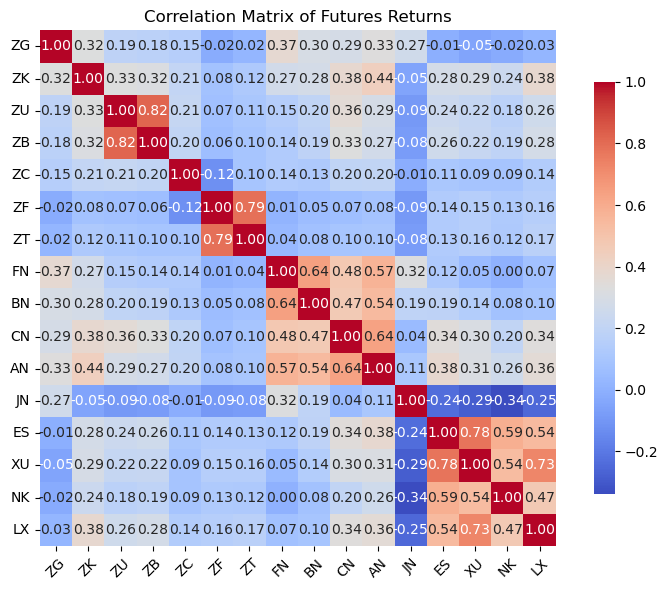

In [43]:
# heatmap of correlations
correlation_matrix = tickers_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Futures Returns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Futures Returns'}, xlabel='date'>

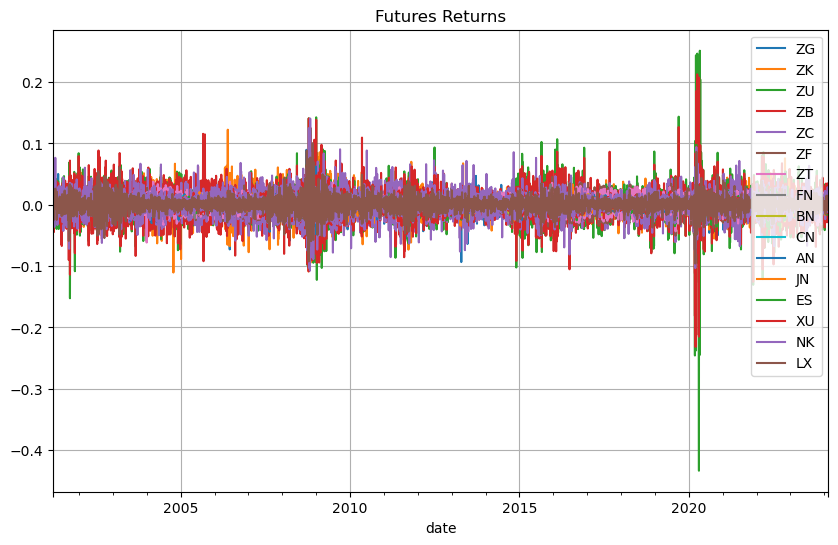

In [45]:
tickers_returns.plot(figsize=(10, 6), title='Futures Returns', grid=True)

<Axes: title={'center': 'ZU Returns'}, xlabel='date'>

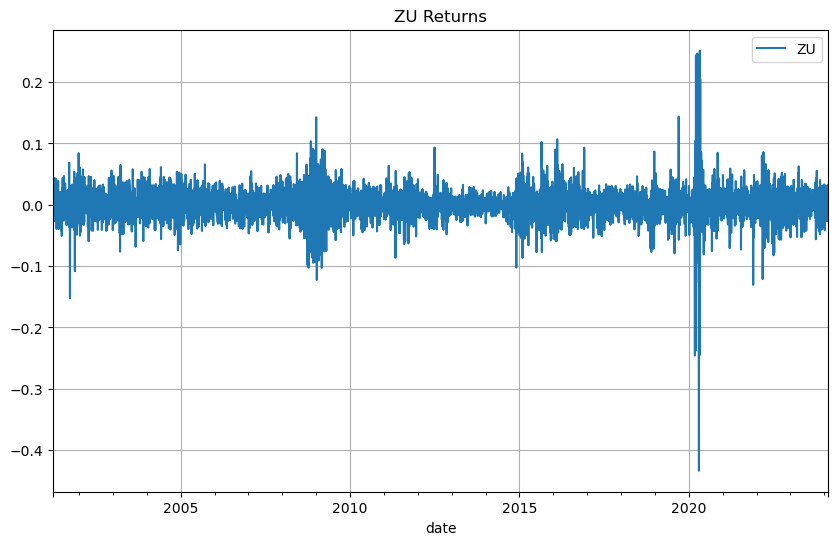

In [46]:
tickers_returns[['ZU']].plot(figsize=(10, 6), title='ZU Returns', grid=True)